In [12]:
import pandas as pd
import numpy as np
from pandas import DataFrame as DF
from matplotlib import pyplot as plt
import networkx as nx
import math

In [13]:
# read data
data = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
test_pairs = test[['source', 'target']].values
data.head()

,video_id,uploader,age,category,length,views,rate,ratings,comments,1,...,11,12,13,14,15,16,17,18,19,20
0,LKh7zAJ4nwo,TheReceptionist,653.0,Entertainment,424.0,13021.0,4.34,1305.0,744.0,NaN,...,DjdA-5oKYFQ,vmdPOOd6cxI,uX81lMev6_o,NaN,W1Uo5DQTtzc,heqocRij5P0,2ZgXx72XmoE,1tUDzOp10pk,DH56yrIO5nI,E-3zXq_r4w0
1,7D0Mf4Kn4Xk,periurban,583.0,Music,201.0,6508.0,4.19,687.0,312.0,AvSK0qPw7EU,...,e2k0h6tPvGc,NaN,VKFqqoeMdjw,NSzrwv5MCwc,y3IDp2n7B48,N1lkLaLJHlc,NHB0a0xtLgU,Eq4hGkIqBGw,bdDskrr8jRY,JngPWhfCb2M
2,n1cEq1C8oqQ,Pipistrello,525.0,Comedy,125.0,1687.0,4.01,363.0,141.0,YfShxdbAJS8,...,eprHhmurMHg,yLup8wjbSIo,z5wDjq8o60c,bWlPSLUT-6U,bSPVayE0NhE,F2_5KOnSsfI,dsBTo5LExr0,gnpvEvuiFoQ,3nH5Tccz8EQ,sEqCkwPmQ_w
3,OHkEzL4Unck,ichannel,638.0,Comedy,299.0,8043.0,4.40,518.0,371.0,NaN,...,eyUSTmEUQRg,LQUV_XGzHmA,nfBfC8bif1Y,aiYwo5K0VWg,N4EYgXReBzM,FMuWYExDEJk,Ml2NaXU6gms,DVNwUKAuB3I,mDjwzhc8dQ0,NyC_0Z6zoUk
4,-boOvAGNKUc,mrpitifulband,639.0,Music,287.0,7548.0,4.48,606.0,386.0,JsdCu9T47iY,...,fmUwUURgsX0,eV2SdBITv8k,sf-Ym_pFP6U,0vhVZQEzgcU,lhWk9SXUjWI,geiABCqmQ84,dDhCZVQf9po,RZo5MisSTWo,saBmFpuwmKA,aVhSaa6aAOg


In [14]:
video_set = data['video_id'].values
video_list = data['video_id'].values.reshape(-1,1)

for i in range(1,21,1):
    video_set = np.concatenate((video_set,data[str(i)].values),axis=0)
    video_list = np.concatenate((video_list,data[str(i)].values.reshape(-1,1)),axis=1)

In [15]:
g= nx.Graph()
g.add_nodes_from(list(set(video_set))[1:])

In [16]:
edge_pairs1 = []
for row in video_list:
    for i in range(20):
        try:
            math.isnan(row[i+1])
        except:
            edge_pairs1.append((row[0], row[i+1]))
            
g.add_edges_from(edge_pairs1)

In [17]:
path_length_undirect=np.ones(99500)*100
ct=0
for index, pair in enumerate(test_pairs):
    try:
        path_length_undirect[index]=nx.shortest_path_length(g, source=pair[0], target=pair[1])
    except: path_length_undirect[index] = 200

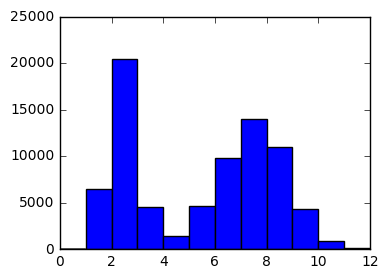

In [18]:
plt.figure(figsize=(4,3))
plt.hist(path_length_undirect,200)
plt.xlim(0,12)
plt.show()

In [19]:
output = np.zeros(99500)
for index, length in enumerate(path_length_undirect):
    if length <= 3 or length == 200:
        output[index]=1

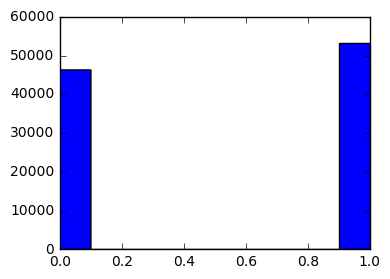

In [20]:
plt.figure(figsize=(4,3))
plt.hist(output)
plt.show()

In [21]:
pd.concat((test['edge_id'],DF(output.astype('int8'),columns=['edge_present'])),axis=1).to_csv('output.csv',index=False)

## this result achieved AUC of 0.92720 on Kaggle